In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np

sns.set_style("whitegrid")

In [14]:
df = pd.read_csv("./results/adam_for_both_all_10.csv")
display(df)

,model_name,feature_set,seq_len,trial,pr_auc,roc_auc,f1,precision@5,precision@10,precision@15,precision@20,precision@25,precision@30
0,bitenet,dxtx,6,0,0.356625,0.566337,0.223350,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,bitenet,dx,6,0,0.372075,0.599143,0.267782,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,rnn,dxtx,6,0,0.389637,0.607489,0.284483,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,rnn,dx,6,0,0.326025,0.546296,0.180905,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,brnn,dxtx,6,0,0.339136,0.546086,0.223301,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,brnn,dx,16,4,0.357637,0.544095,0.273585,0.635802,0.668022,0.665675,0.662066,0.661331,0.662030
296,retain,dxtx,16,4,0.335732,0.604528,0.218341,0.898494,0.862821,0.847779,0.838289,0.832015,0.828667
297,retain,dx,16,4,0.353929,0.584628,0.275229,0.832794,0.750330,0.713897,0.701853,0.697997,0.698150
298,deepr,dxtx,16,4,0.326195,0.557034,0.208333,0.676306,0.593527,0.559430,0.532323,0.517593,0.511738


In [15]:
grouped_df = df.groupby(by=["model_name", "feature_set"]).mean().drop(columns=["trial", "seq_len", "roc_auc", "f1"])
display(df.groupby(by=["model_name", "feature_set"]).mean().drop(columns=["trial", "seq_len", "roc_auc", "f1"]))

pr_auc  precision@5  precision@10  precision@15   
model_name feature_set                                                      
bitenet    dx           0.355681     0.550462      0.536729      0.534696  \
           dxtx         0.359103     0.585287      0.567253      0.561892   
brnn       dx           0.365649     0.620556      0.620802      0.620133   
           dxtx         0.373146     0.491877      0.477778      0.473981   
deepr      dx           0.355620     0.588060      0.572837      0.562357   
           dxtx         0.350349     0.576510      0.568469      0.566812   
retain     dx           0.341439     0.629416      0.611006      0.598031   
           dxtx         0.344365     0.510291      0.505633      0.504717   
rnn        dx           0.366736     0.526781      0.520388      0.518142   
           dxtx         0.374199     0.495625      0.488228      0.485796   

                        precision@20  precision@25  precision@30  
model_name feature_set                                            
bitenet    dx               0.533270      0.532193      0.531532  
           dxtx             0.560293      0.559192      0.558567  
brnn       dx               0.620095      0.619985      0.620001  
           dxtx             0.471504      0.470096      0.469508  
deepr      dx               0.557180      0.553376      0.551784  
           dxtx             0.565675      0.565125      0.564682  
retain     dx               0.591123      0.586245      0.583287  
           dxtx             0.503530      0.501921      0.500975  
rnn        dx               0.517422      0.517077      0.516935  
           dxtx             0.484771      0.484403      0.484108

,model_name,feature_set,seq_len,precision@20
0,bitenet,dx,6,0.581930
1,bitenet,dx,8,0.738945
2,bitenet,dx,10,0.400000
3,bitenet,dx,12,0.589445
4,bitenet,dx,14,0.743790


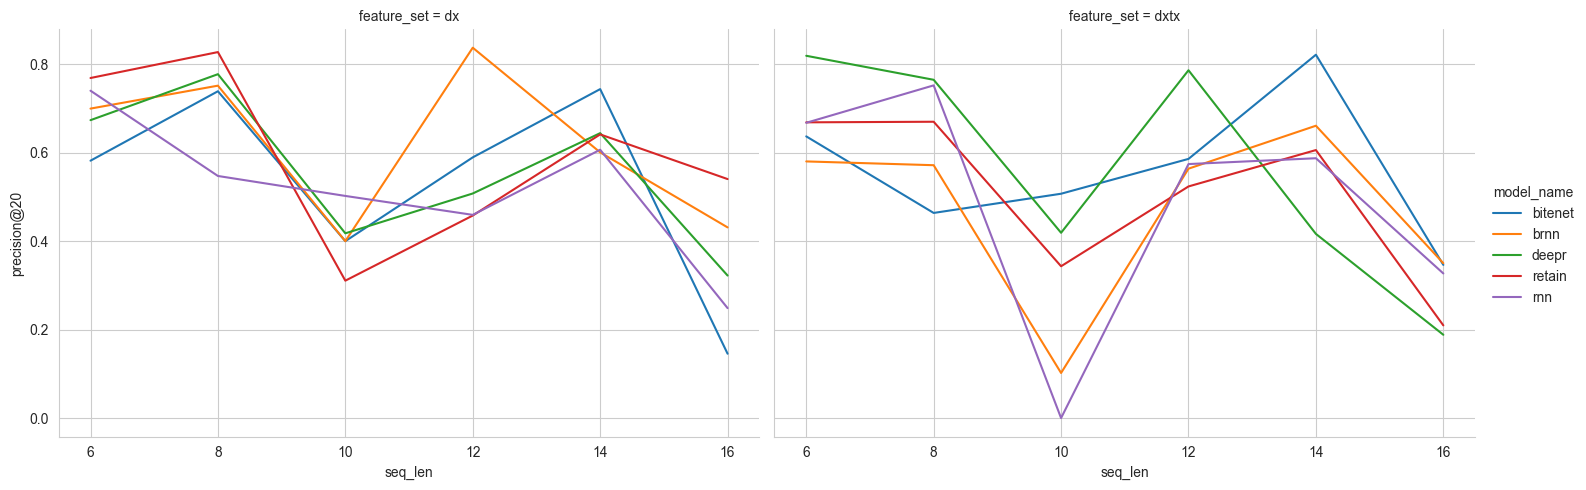

In [23]:
robustness_comp_df = df[['model_name', 'feature_set', 'seq_len', 'trial', 'precision@20']]
robustness_comp_df = robustness_comp_df.groupby(by=['model_name', 'feature_set', 'seq_len']).mean().drop(columns=['trial']).reset_index()
display(robustness_comp_df.head())

g = sns.relplot(
    data=robustness_comp_df,
    x='seq_len',
    y='precision@20',
    col='feature_set',
    hue='model_name',
    kind='line',
    aspect=1.5
)

plt.savefig("test.png")

In [10]:
precisions_np = precisions_df.to_numpy()
nonzero = np.where(precisions_np.sum(axis=1) > 0, True, False)
display(df.loc[nonzero].groupby(by=["model_name", "feature_set"]).mean().drop(columns=["seq_len", "trial", "roc_auc", "f1"]))

pr_auc  precision@5  precision@10  precision@15   
model_name feature_set                                                      
bitenet    dx           0.361300     0.786374      0.766755      0.763852  \
           dxtx         0.364946     0.798119      0.773527      0.766216   
brnn       dx           0.368545     0.846212      0.846548      0.845636   
           dxtx         0.376067     0.776648      0.754387      0.748390   
deepr      dx           0.357523     0.767035      0.747178      0.733509   
           dxtx         0.349049     0.720637      0.710587      0.708515   
retain     dx           0.343315     0.820978      0.796964      0.780041   
           dxtx         0.343824     0.695851      0.689499      0.688250   
rnn        dx           0.363548     0.790172      0.780582      0.777213   
           dxtx         0.379328     0.826041      0.813713      0.809660   

                        precision@20  precision@25  precision@30  
model_name feature_set                                            
bitenet    dx               0.761814      0.760276      0.759332  
           dxtx             0.764036      0.762535      0.761682  
brnn       dx               0.845584      0.845434      0.845456  
           dxtx             0.744480      0.742257      0.741328  
deepr      dx               0.726756      0.721795      0.719718  
           dxtx             0.707093      0.706406      0.705852  
retain     dx               0.771029      0.764667      0.760809  
           dxtx             0.686632      0.684438      0.683148  
rnn        dx               0.776133      0.775615      0.775403  
           dxtx             0.807951      0.807339      0.806847